# Tests mit Datensatz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/sample_data/flightlist_20190101_20190131.csv"
flightlist_20190101_20190131 = pd.read_csv(file_path)

print(flightlist_20190101_20190131.head())


<ipython-input-18-d6c892cfd78d>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  flightlist_20190101_20190131 = pd.read_csv(file_path)


  callsign number  icao24 registration typecode origin destination  \
0    HVN19    NaN  888152          NaN      NaN   YMML        LFPG   
1   CCA839    NaN  780ad1          NaN      NaN   YMML        LEBL   
2   CES219    NaN  780b7e       B-5936     A332   YSSY        EDDF   
3   AEA040    NaN  34444e       EC-LVL     A332   LEMD        LEMD   
4   CXA825    NaN  780d75       B-2760     B788   YSSY        LFPG   

                   firstseen                   lastseen  \
0  2018-12-31 00:43:16+00:00  2019-01-01 04:56:29+00:00   
1  2018-12-31 00:53:08+00:00  2019-01-01 06:01:42+00:00   
2  2018-12-31 01:05:29+00:00  2019-01-01 04:09:29+00:00   
3  2018-12-31 01:07:21+00:00  2019-01-01 03:32:59+00:00   
4  2018-12-31 01:18:29+00:00  2019-01-01 04:32:28+00:00   

                         day  latitude_1  longitude_1  altitude_1  latitude_2  \
0  2019-01-01 00:00:00+00:00  -37.659485   144.804421       304.8   48.995316   
1  2019-01-01 00:00:00+00:00  -37.692123   144.841997       30

# Plot of all flights

<ipython-input-19-b8f93643a3d7>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv(file_path)


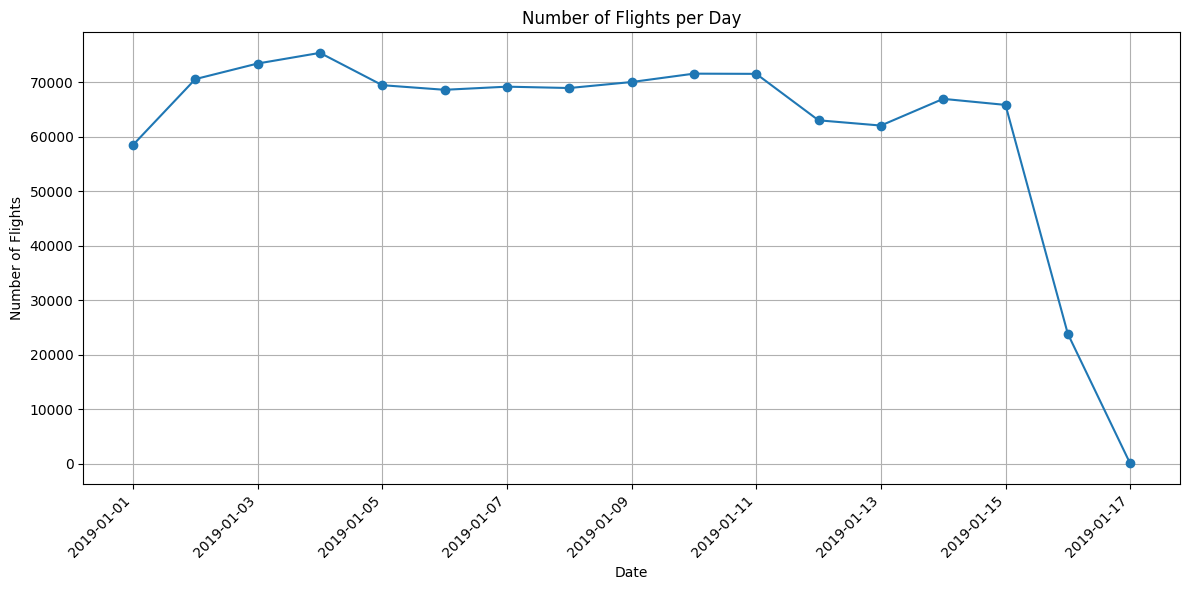

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
file_path = "/content/sample_data/flightlist_20190101_20190131.csv"  # Replace with your actual file path
flights_data = pd.read_csv(file_path)

# 2. Extract the date (ignoring time) from the 'day' column
flights_data['date'] = pd.to_datetime(flights_data['day']).dt.date

# 3. Group by date and count flights
daily_flights = flights_data.groupby('date')['date'].count().reset_index(name='count')

# 4. Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(daily_flights['date'], daily_flights['count'], marker='o')
plt.title('Number of Flights per Day')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Plot of all German flights

<ipython-input-25-ff70ab684bf1>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv(file_path, parse_dates=['day'])
<ipython-input-25-ff70ab684bf1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flights.loc[:, 'date'] = pd.to_datetime(filtered_flights['day']).dt.date


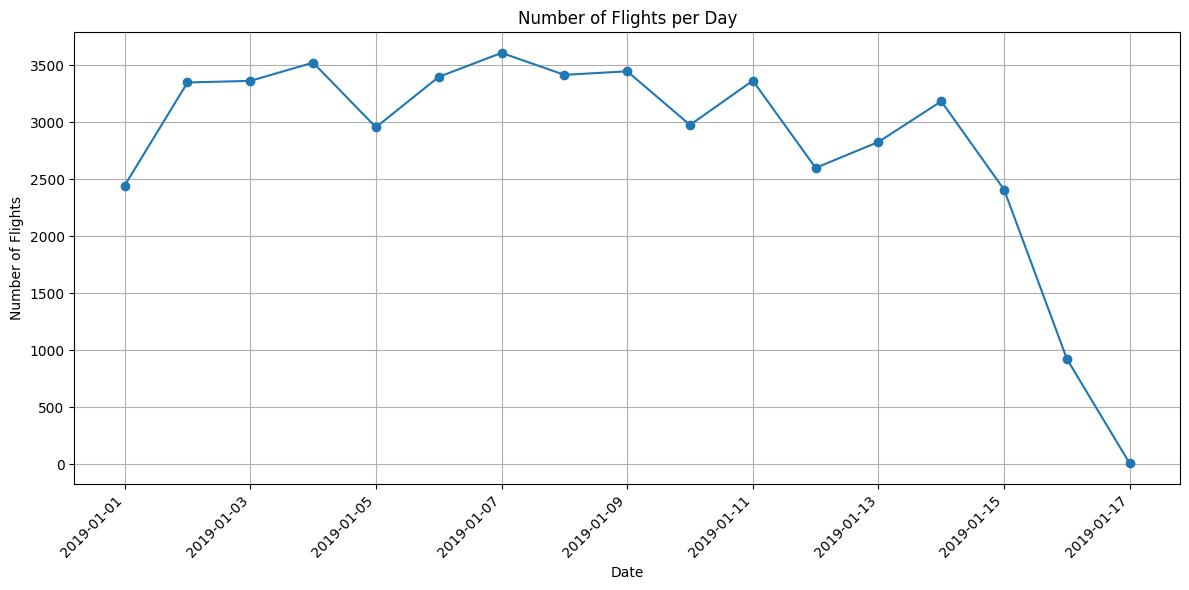

In [ ]:
import pandas as pd

# 1. Load the dataset
file_path = '/content/sample_data/flightlist_20190101_20190131.csv'  # Replace with your actual file path
flights_data = pd.read_csv(file_path)

# 2. Define the list of ICAO codes
icao_codes = ["EDDF", "EDDM", "EDDB", "EDDL", "EDDH", "EDDS", "EDDK", "EDDV", "EDDN", "EDDW", "EDDP", "EDDC", "EDDG", "EDNY", "EDSB", "EDDR", "EDDE", "EDMA", "EDJA", "EDHL"]

# 3. Filter the dataset
filtered_flights = flights_data[
    flights_data['origin'].isin(icao_codes) | flights_data['destination'].isin(icao_codes)
]


# 2. Extract the date (ignoring time) from the 'day' column
filtered_flights['date'] = pd.to_datetime(filtered_flights['day']).dt.date

# 3. Group by date and count flights
daily_flights = filtered_flights.groupby('date')['date'].count().reset_index(name='count')

# 4. Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(daily_flights['date'], daily_flights['count'], marker='o')
plt.title('Number of Flights per Day')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Flüge von und nach Deutschland

Number of nodes (airports): 630
Number of edges (flights): 3074


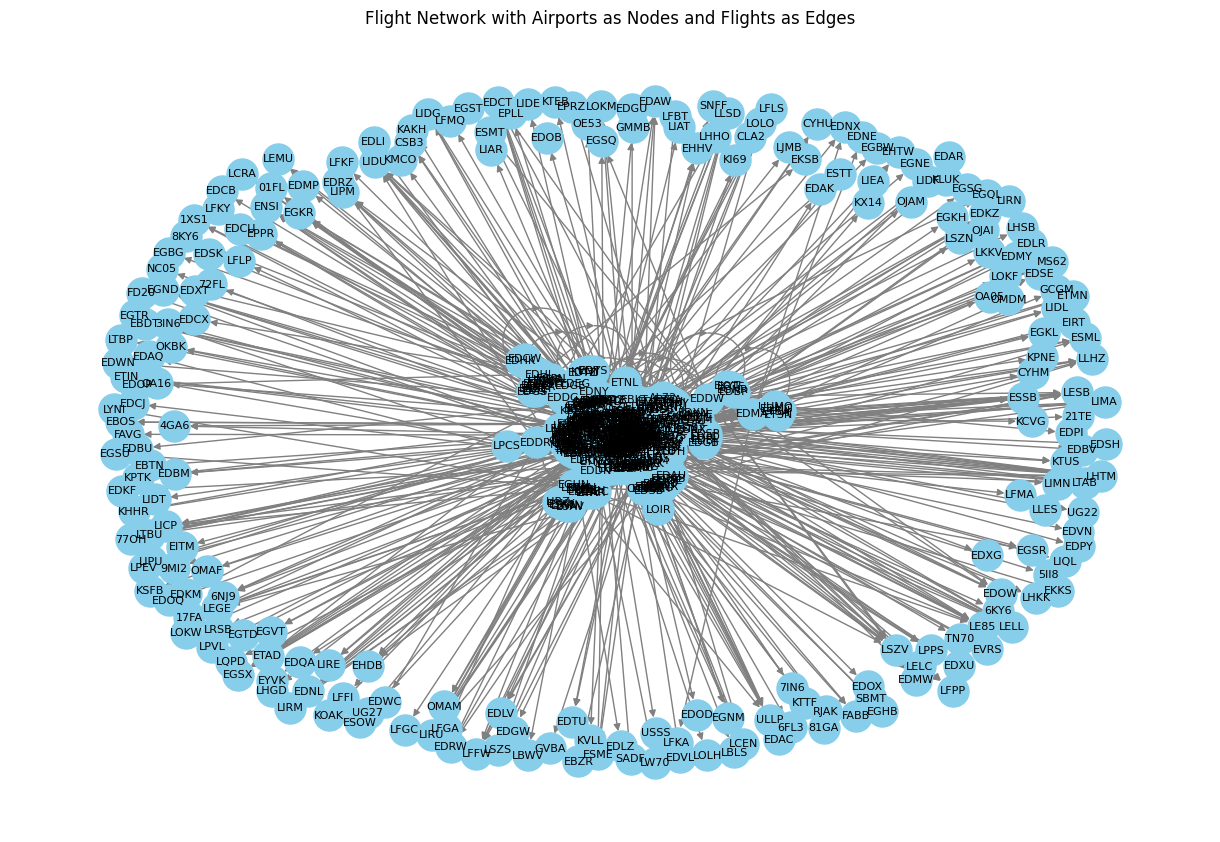

In [ ]:
import networkx as nx
import pandas as pd

# Load the data
file_path = "/content/sample_data/flightlist_20190101_20190131.csv"
flights_data = pd.read_csv(file_path, parse_dates=['firstseen', 'lastseen', 'day'], low_memory=False)

filtered_flights = flights_data[
    flights_data['origin'].isin(icao_codes) | flights_data['destination'].isin(icao_codes)
]

# Create a directed graph
flight_graph = nx.DiGraph()

# Add nodes and edges from the flights data
for index, row in filtered_flights.iterrows():
    origin = row['origin']
    destination = row['destination']

    # Ensure both origin and destination are non-null
    if pd.notnull(origin) and pd.notnull(destination):
        # Add the origin and destination as nodes if they don't exist
        if origin not in flight_graph:
            flight_graph.add_node(origin)
        if destination not in flight_graph:
            flight_graph.add_node(destination)

        # Add an edge from origin to destination, with optional attributes
        flight_graph.add_edge(
            origin,
            destination,
            callsign=row['callsign'],
            firstseen=row['firstseen'],
            lastseen=row['lastseen'],
            typecode=row['typecode']
        )

# Optional: Inspect the graph
print("Number of nodes (airports):", flight_graph.number_of_nodes())
print("Number of edges (flights):", flight_graph.number_of_edges())

# Example plot of the network
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
nx.draw(flight_graph, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', font_size=8)
plt.title("Flight Network with Airports as Nodes and Flights as Edges")
plt.show()


# Flüge innerhalb Deutschland

Number of nodes (airports): 20
Number of edges (flights): 203


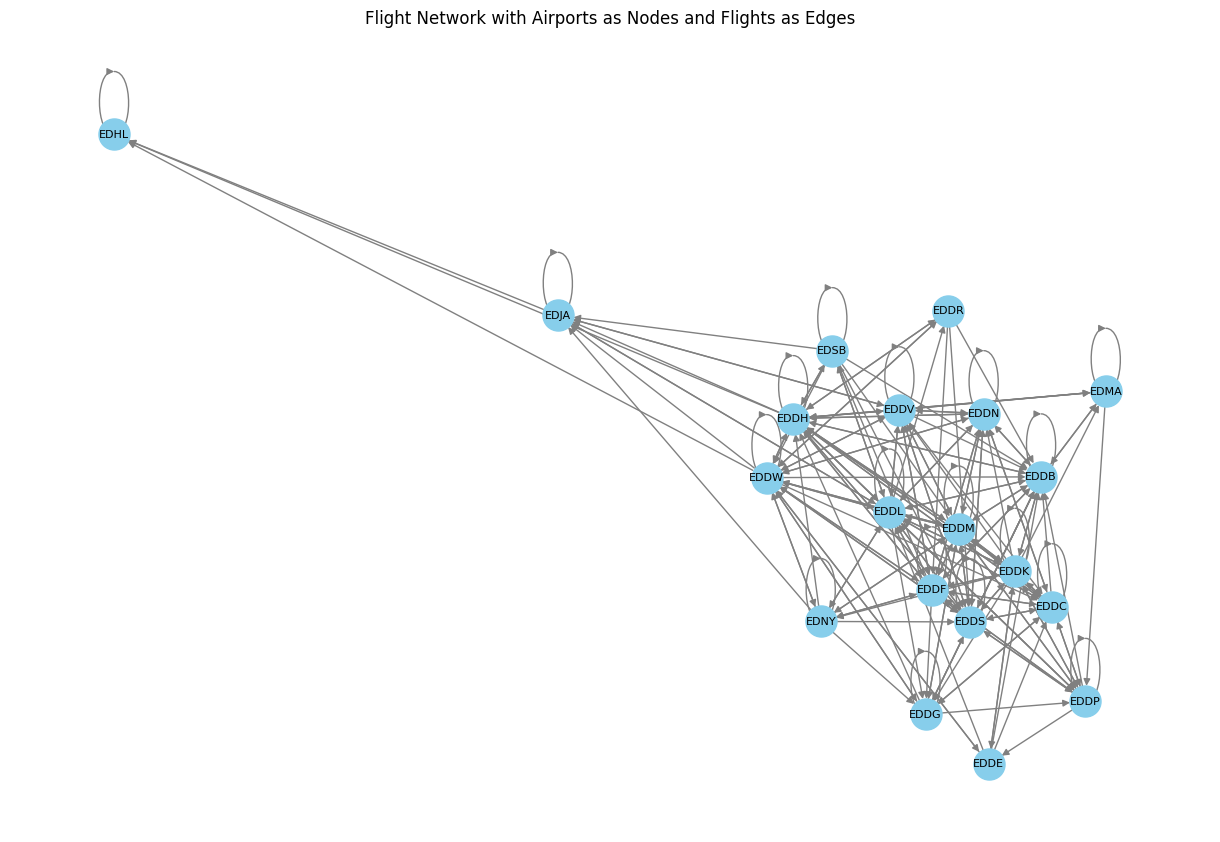

In [ ]:
import networkx as nx
import pandas as pd

# Load the data
file_path = "/content/sample_data/flightlist_20190101_20190131.csv"
flights_data = pd.read_csv(file_path, parse_dates=['firstseen', 'lastseen', 'day'], low_memory=False)

filtered_flights = flights_data[
    flights_data['origin'].isin(icao_codes) & flights_data['destination'].isin(icao_codes)
]

# Create a directed graph
flight_graph = nx.DiGraph()

# Add nodes and edges from the flights data
for index, row in filtered_flights.iterrows():
    origin = row['origin']
    destination = row['destination']

    # Ensure both origin and destination are non-null
    if pd.notnull(origin) and pd.notnull(destination):
        # Add the origin and destination as nodes if they don't exist
        if origin not in flight_graph:
            flight_graph.add_node(origin)
        if destination not in flight_graph:
            flight_graph.add_node(destination)

        # Add an edge from origin to destination, with optional attributes
        flight_graph.add_edge(
            origin,
            destination,
            callsign=row['callsign'],
            firstseen=row['firstseen'],
            lastseen=row['lastseen'],
            typecode=row['typecode']
        )

# Optional: Inspect the graph
print("Number of nodes (airports):", flight_graph.number_of_nodes())
print("Number of edges (flights):", flight_graph.number_of_edges())

# Example plot of the network
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
nx.draw(flight_graph, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', font_size=8)
plt.title("Flight Network with Airports as Nodes and Flights as Edges")
plt.show()

# Flüge auf Deutschlandkarte

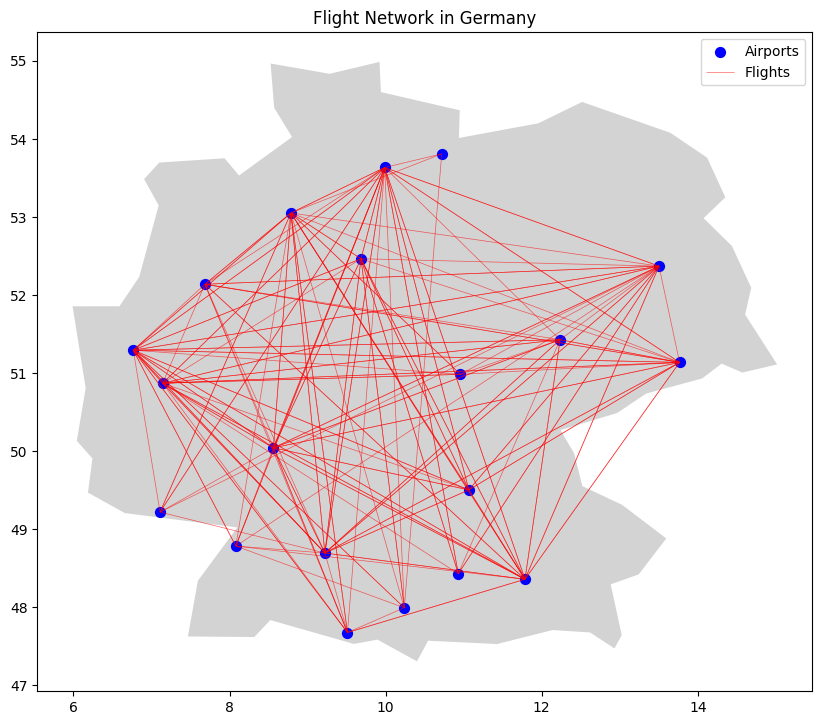

In [ ]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Load the downloaded Natural Earth shapefile directly
germany = gpd.read_file("/content/ne_110m_admin_0_countries.shp")
germany = germany[germany['SOVEREIGNT'] == "Germany"]  # Adjust column name if necessary

# ICAO codes and coordinates for major German airports
airport_coords = {
    "EDDF": (50.0379, 8.5622),   # Frankfurt
    "EDDM": (48.3538, 11.7861),  # Munich
    "EDDB": (52.3667, 13.5033),  # Berlin Brandenburg
    "EDDL": (51.2895, 6.7668),   # Düsseldorf
    "EDDH": (53.6304, 9.9882),   # Hamburg
    "EDDS": (48.6899, 9.2219),   # Stuttgart
    "EDDK": (50.8659, 7.1427),   # Cologne Bonn
    "EDDV": (52.4611, 9.6851),   # Hannover
    "EDDN": (49.4987, 11.0669),  # Nuremberg
    "EDDW": (53.0475, 8.7867),   # Bremen
    "EDDP": (51.4239, 12.2364),  # Leipzig/Halle
    "EDDC": (51.1328, 13.7673),  # Dresden
    "EDDG": (52.1346, 7.6848),   # Münster Osnabrück
    "EDNY": (47.6713, 9.5115),   # Friedrichshafen
    "EDSB": (48.7793, 8.0805),   # Karlsruhe/Baden-Baden
    "EDDR": (49.2146, 7.1095),   # Saarbrücken
    "EDDE": (50.9798, 10.9581),  # Erfurt-Weimar
    "EDMA": (48.4251, 10.9312),  # Augsburg
    "EDJA": (47.9888, 10.2395),  # Memmingen
    "EDHL": (53.8054, 10.7192),  # Lübeck
}

# Load flight data
file_path = "/content/sample_data/flightlist_20190101_20190131.csv"
flights_data = pd.read_csv(file_path, parse_dates=['firstseen', 'lastseen', 'day'], low_memory=False)

# Filter for flights within Germany
icao_codes = list(airport_coords.keys())
german_flights = flights_data[
    flights_data['origin'].isin(icao_codes) & flights_data['destination'].isin(icao_codes)
]

# Create the graph
flight_graph = nx.DiGraph()

# Add edges based on filtered flight data
for _, row in german_flights.iterrows():
    origin = row['origin']
    destination = row['destination']
    if pd.notnull(origin) and pd.notnull(destination):
        flight_graph.add_edge(origin, destination)

# Convert airport coordinates to a GeoDataFrame
airport_points = pd.DataFrame({
    'icao': list(airport_coords.keys()),
    'latitude': [coord[0] for coord in airport_coords.values()],
    'longitude': [coord[1] for coord in airport_coords.values()],
})
airport_points['geometry'] = airport_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_airports = gpd.GeoDataFrame(airport_points, geometry='geometry')

# Create edges as LineStrings for flights
edges = []
for origin, destination in flight_graph.edges():
    if origin in airport_coords and destination in airport_coords:
        line = LineString([Point(airport_coords[origin][1], airport_coords[origin][0]),
                           Point(airport_coords[destination][1], airport_coords[destination][0])])
        edges.append({'origin': origin, 'destination': destination, 'geometry': line})

gdf_edges = gpd.GeoDataFrame(edges, geometry='geometry')

# Load a map of Germany
germany = gpd.read_file("/content/ne_110m_admin_0_countries.shp")
germany = germany[germany['SOVEREIGNT'] == "Germany"]  # Adjust column name if necessary

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
germany.plot(ax=ax, color='lightgrey')

# Plot airports
gdf_airports.plot(ax=ax, color='blue', markersize=50, label='Airports')

# Plot flight connections
gdf_edges.plot(ax=ax, color='red', linewidth=0.5, alpha=0.6, label='Flights')

plt.title("Flight Network in Germany")
plt.legend()
plt.show()

# Flüge mit Gewicht auf Deutschlandkarte

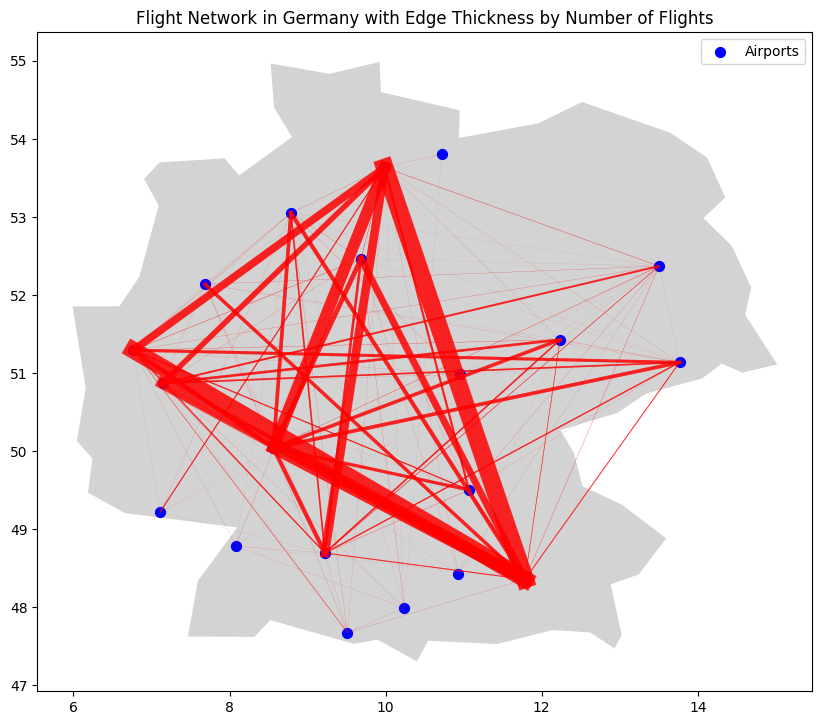

In [ ]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# ICAO codes and coordinates for major German airports
airport_coords = {
    "EDDF": (50.0379, 8.5622),   # Frankfurt
    "EDDM": (48.3538, 11.7861),  # Munich
    "EDDB": (52.3667, 13.5033),  # Berlin Brandenburg
    "EDDL": (51.2895, 6.7668),   # Düsseldorf
    "EDDH": (53.6304, 9.9882),   # Hamburg
    "EDDS": (48.6899, 9.2219),   # Stuttgart
    "EDDK": (50.8659, 7.1427),   # Cologne Bonn
    "EDDV": (52.4611, 9.6851),   # Hannover
    "EDDN": (49.4987, 11.0669),  # Nuremberg
    "EDDW": (53.0475, 8.7867),   # Bremen
    "EDDP": (51.4239, 12.2364),  # Leipzig/Halle
    "EDDC": (51.1328, 13.7673),  # Dresden
    "EDDG": (52.1346, 7.6848),   # Münster Osnabrück
    "EDNY": (47.6713, 9.5115),   # Friedrichshafen
    "EDSB": (48.7793, 8.0805),   # Karlsruhe/Baden-Baden
    "EDDR": (49.2146, 7.1095),   # Saarbrücken
    "EDDE": (50.9798, 10.9581),  # Erfurt-Weimar
    "EDMA": (48.4251, 10.9312),  # Augsburg
    "EDJA": (47.9888, 10.2395),  # Memmingen
    "EDHL": (53.8054, 10.7192),  # Lübeck
}

# Load flight data
file_path = "/content/sample_data/flightlist_20190101_20190131.csv"
flights_data = pd.read_csv(file_path, parse_dates=['firstseen', 'lastseen', 'day'], low_memory=False)

# Filter for flights within Germany
icao_codes = list(airport_coords.keys())
german_flights = flights_data[
    flights_data['origin'].isin(icao_codes) & flights_data['destination'].isin(icao_codes)
]

# Count flights between each origin and destination
flight_counts = german_flights.groupby(['origin', 'destination']).size().reset_index(name='count')

# Create the graph
flight_graph = nx.DiGraph()

# Add edges with flight count as weight
for _, row in flight_counts.iterrows():
    origin = row['origin']
    destination = row['destination']
    count = row['count']
    flight_graph.add_edge(origin, destination, weight=count)

# Convert airport coordinates to a GeoDataFrame
airport_points = pd.DataFrame({
    'icao': list(airport_coords.keys()),
    'latitude': [coord[0] for coord in airport_coords.values()],
    'longitude': [coord[1] for coord in airport_coords.values()],
})
airport_points['geometry'] = airport_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_airports = gpd.GeoDataFrame(airport_points, geometry='geometry')

# Create edges as LineStrings with weights for flights
edges = []
for origin, destination, data in flight_graph.edges(data=True):
    if origin in airport_coords and destination in airport_coords:
        line = LineString([Point(airport_coords[origin][1], airport_coords[origin][0]),
                           Point(airport_coords[destination][1], airport_coords[destination][0])])
        edges.append({'origin': origin, 'destination': destination, 'geometry': line, 'weight': data['weight']})

gdf_edges = gpd.GeoDataFrame(edges, geometry='geometry')

# Load a map of Germany
germany = gpd.read_file("/content/ne_110m_admin_0_countries.shp")
germany = germany[germany['SOVEREIGNT'] == "Germany"]  # Adjust column name if necessary

# Plot the map with edge thickness based on flight counts
fig, ax = plt.subplots(figsize=(10, 10))
germany.plot(ax=ax, color='lightgrey')

# Plot airports
gdf_airports.plot(ax=ax, color='blue', markersize=50, label='Airports')

# Plot flight connections with thickness proportional to flight count
for _, row in gdf_edges.iterrows():
    ax.plot(*row['geometry'].xy, color='red', linewidth=row['weight'] / 20, alpha=0.6)  # Adjust divisor to control thickness

plt.title("Flight Network in Germany with Edge Thickness by Number of Flights")
plt.legend()
plt.show()